In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Lectura de datos.

In [68]:
df = pd.read_csv('datos/diabetes.csv')

X = df.drop(['Y'], axis=1)
y = df['Y']

df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Y'], dtype='object')

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Modelo de regresión lineal

In [70]:
model = LinearRegression()
model.fit(X, y)
scores = cross_val_score(model, X, y, cv=5)
print('MSE: ', scores.mean())

MSE:  0.48231812211149394


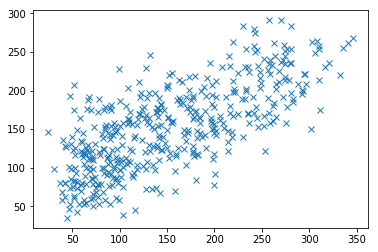

In [71]:
y_pred = model.predict(X)
plt.plot(y, y_pred, 'x')

Función para evaluar la regresión Lineal

In [27]:
def evaluate_model(X_new, y):
    m = linear_model.LinearRegression()
    
    m.fit(X_new, y)
    y_pred = m.predict(X_new)
    print(f'MSE: {mean_squared_error(y, y_pred):.2f}')
    print(f'R2: {r2_score(y, y_pred):.2f}')
    
    diag = np.linspace(0, 350, 100)

    plt.figure(figsize=(7,7))
    plt.title('y vs y_pred')
    plt.xlabel('y')
    plt.ylabel('y_pred')
    plt.plot(y, y_pred, 'o', markersize=3)
    plt.plot(diag, diag);
    plt.show()
    
    
def evaluate_model_crossval(X_new, y, cv=5):
    m = linear_model.LinearRegression()
    scores = cross_val_score(m, X_new, y, cv=cv)
    print(f'R2: {scores.mean():0.2f} (+/- {(scores.std() * 2):0.2f})')
    
    
def evaluate_model_crossval_kfold(X_new, y, n_splits=5):
    m = linear_model.LinearRegression()
    r_scores = []
    mse = []
    for train, test in KFold(n_splits=n_splits).split(X_new):
        X_train, X_test = X_new[train], X_new[test]
        y_train, y_test = y[train], y[test]        
        
        m.fit(X_train, y_train)        
        y_pred_test = m.predict(X_test)
        
        #r_scores.append(m.fit(X_train, y_train).score(X_test, y_test))
        r_scores.append(r2_score(y_test, y_pred_test)) 
        mse.append(mean_squared_error(y_test, y_pred_test))        
    
    #return np.mean(mse), np.mean(r_scores), np.std(mse), np.std(r_scores)
    print(f'MSE: {np.mean(mse):.2f} (+/- {(np.std(mse) * 2):0.2f})')
    print(f'R2: {np.mean(r_scores):.2f} (+/- {(np.std(r_scores) * 2):0.2f})')

# Transformaciones

In [47]:
X['age'] = X['age'].apply(lambda x: np.fabs(x))
X['sex'] = X['sex'].apply(lambda x: np.fabs(x))
X['bmi'] = X['bmi'].apply(lambda x: np.fabs(x))
X['s1'] = X['s1'].apply(lambda x: np.fabs(x))
X['s2'] = X['s2'].apply(lambda x: np.fabs(x))
X['s3'] = X['s3'].apply(lambda x: np.fabs(x))
X['s4'] = X['s4'].apply(lambda x: np.fabs(x))
X['s5'] = X['s5'].apply(lambda x: np.fabs(x))
X['s6'] = X['s6'].apply(lambda x: np.fabs(x))

### Método de selección: Coeficientes de la regresión

In [48]:
import statsmodels.api as sm

In [49]:
x_sm = sm.add_constant(X)
model = sm.OLS(y, x_sm)
results = model.fit()
results.summary()

C:\Users\Lenovo\Nueva carpeta\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     18.09
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.18e-27
Time:                        00:13:09   Log-Likelihood:                -2469.7
No. Observations:                 442   AIC:                             4961.
Df Residuals:                     431   BIC:                             5006.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.4274     26.418      6.754      0.000     126.504     230.351
age          541.5975   1216.926      0.445      0.657   -1850.251    2933.446
sex        -1.871e+04   1.13e+04     -1.659      0.098   -4.09e+04    3450.854
bmi         5092.6011    961.613      5.296      0.000    3202.566    6982.636
bp           708.5572     68.280     10.377      0.000     574.354     842.760
s1          3359.6345   1927.006      1.743      0.082    -427.863    7147.132
s2         -4221.5100   1966.129     -2.147      0.032   -8085.903    -357.117
s3         -2960.2780    869.427     -3.405      0.001   -4669.121   -1251.435
s4          4003.2324   1199.374      3.338      0.001    1645.882    6360.583
s5          -957.7424   1137.897     -0.842      0.400   -3194.260    1278.776
s6          2233.4941    947.163      2.358      0.019     371.861    4095.128
==============================================================================
Omnibus:                       15.748   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.444
Skew:                           0.284   Prob(JB):                      0.00327
Kurtosis:                       2.453   Cond. No.                     3.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
x_sm = sm.add_constant(X.drop(['age'], axis=1))
model = sm.OLS(y, x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     20.12
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.80e-28
Time:                        00:13:27   Log-Likelihood:                -2469.8
No. Observations:                 442   AIC:                             4960.
Df Residuals:                     432   BIC:                             5001.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        179.7155     26.234      6.850      0.000     128.153     231.278
sex        -1.875e+04   1.13e+04     -1.664      0.097   -4.09e+04    3396.277
bmi         5103.5307    960.407      5.314      0.000    3215.879    6991.182
bp           704.8663     67.711     10.410      0.000     571.781     837.951
s1          3426.5212   1919.352      1.785      0.075    -345.909    7198.952
s2         -4271.0635   1961.151     -2.178      0.030   -8125.647    -416.480
s3         -2997.5126    864.588     -3.467      0.001   -4696.835   -1298.190
s4          4016.5155   1197.890      3.353      0.001    1662.099    6370.932
s5          -946.1520   1136.543     -0.832      0.406   -3179.993    1287.689
s6          2223.2304    946.003      2.350      0.019     363.889    4082.572
==============================================================================
Omnibus:                       15.268   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.208
Skew:                           0.282   Prob(JB):                      0.00368
Kurtosis:                       2.460   Cond. No.                     3.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
x_sm = sm.add_constant(X.drop(['age', 's5'], axis=1))
model = sm.OLS(y, x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     22.56
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           7.91e-29
Time:                        00:14:02   Log-Likelihood:                -2470.2
No. Observations:                 442   AIC:                             4958.
Df Residuals:                     433   BIC:                             4995.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.7399     26.117      6.805      0.000     126.407     229.073
sex        -1.847e+04   1.13e+04     -1.641      0.102   -4.06e+04    3654.075
bmi         5084.5477    959.796      5.298      0.000    3198.110    6970.986
bp           702.5481     67.630     10.388      0.000     569.624     835.472
s1          2895.4822   1809.607      1.600      0.110    -661.223    6452.188
s2         -3687.4797   1830.931     -2.014      0.045   -7286.098     -88.861
s3         -2924.0785    859.772     -3.401      0.001   -4613.923   -1234.234
s4          3663.2737   1119.821      3.271      0.001    1462.312    5864.235
s6          2121.1793    937.694      2.262      0.024     278.181    3964.178
==============================================================================
Omnibus:                       16.112   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.596
Skew:                           0.284   Prob(JB):                      0.00303
Kurtosis:                       2.446   Cond. No.                     3.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
x_sm = sm.add_constant(X.drop(['age', 's5', 's1'], axis=1))
model = sm.OLS(y, x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     25.33
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           5.18e-29
Time:                        00:14:18   Log-Likelihood:                -2471.5
No. Observations:                 442   AIC:                             4959.
Df Residuals:                     434   BIC:                             4992.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.7620     26.164      6.794      0.000     126.337     229.187
sex        -1.776e+04   1.13e+04     -1.576      0.116   -3.99e+04    4391.757
bmi         5118.3622    961.286      5.324      0.000    3229.007    7007.718
bp           703.0373     67.751     10.377      0.000     569.876     836.198
s2         -1236.0355   1004.297     -1.231      0.219   -3209.926     737.855
s3         -2900.7970    861.192     -3.368      0.001   -4593.423   -1208.171
s4          3319.8408   1101.033      3.015      0.003    1155.822    5483.860
s6          2126.1931    939.373      2.263      0.024     279.907    3972.479
==============================================================================
Omnibus:                       16.884   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.522
Skew:                           0.271   Prob(JB):                      0.00315
Kurtosis:                       2.424   Cond. No.                     3.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
x_sm = sm.add_constant(X.drop(['age', 's5', 's1', 's2'], axis=1))
model = sm.OLS(y, x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     29.26
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.90e-29
Time:                        00:14:33   Log-Likelihood:                -2472.2
No. Observations:                 442   AIC:                             4958.
Df Residuals:                     435   BIC:                             4987.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.2310     26.150      6.739      0.000     124.834     227.627
sex        -1.792e+04   1.13e+04     -1.589      0.113   -4.01e+04    4238.683
bmi         5149.3251    961.525      5.355      0.000    3259.512    7039.138
bp           707.8237     67.679     10.458      0.000     574.805     840.843
s3         -2700.1071    846.114     -3.191      0.002   -4363.087   -1037.128
s4          2616.7976    941.814      2.778      0.006     765.725    4467.870
s6          2202.7602    937.865      2.349      0.019     359.450    4046.071
==============================================================================
Omnibus:                       14.850   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.630
Skew:                           0.265   Prob(JB):                      0.00492
Kurtosis:                       2.456   Cond. No.                     3.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
x_sm = sm.add_constant(X.drop(['age', 's5', 's1', 's2', 'sex'], axis=1))
model = sm.OLS(y, x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     34.49
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.05e-29
Time:                        00:14:44   Log-Likelihood:                -2473.5
No. Observations:                 442   AIC:                             4959.
Df Residuals:                     436   BIC:                             4984.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.3663      4.788     28.272      0.000     125.956     144.777
bmi         5254.9191    960.905      5.469      0.000    3366.337    7143.502
bp           682.1984     65.846     10.361      0.000     552.783     811.613
s3         -2574.7544    843.904     -3.051      0.002   -4233.380    -916.129
s4          2491.9190    940.173      2.650      0.008     644.084    4339.754
s6          2239.0303    939.227      2.384      0.018     393.054    4085.006
==============================================================================
Omnibus:                       15.075   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.282
Skew:                           0.287   Prob(JB):                      0.00355
Kurtosis:                       2.469   Cond. No.                         341.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_resultado = X.drop(['age', 's5', 's1', 's2', 'sex'], axis=1)
X_resultado.columns

Index(['bmi', 'bp', 's3', 's4', 's6'], dtype='object')

# Evaluación

MSE: 4249.21
R2: 0.28


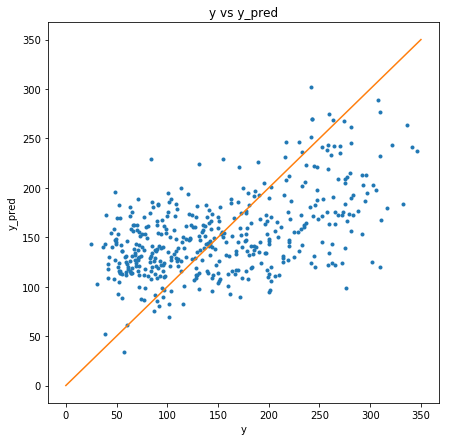

In [56]:
evaluate_model(X_resultado, y)

In [57]:
evaluate_model_crossval(X_resultado, y)

R2: 0.25 (+/- 0.15)


# Método de selección: SelectKBest

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

Se selecciona les 6 mejores caracteristicas

In [59]:
selector = SelectKBest(score_func=f_regression, k=6)
X_new = selector.fit_transform(X, y)
features = df.drop(['Y'], axis=1).columns[selector.get_support()]
print(features)

Index(['bmi', 'bp', 's3', 's4', 's5', 's6'], dtype='object')


Evaluación

MSE: 4249.19
R2: 0.28


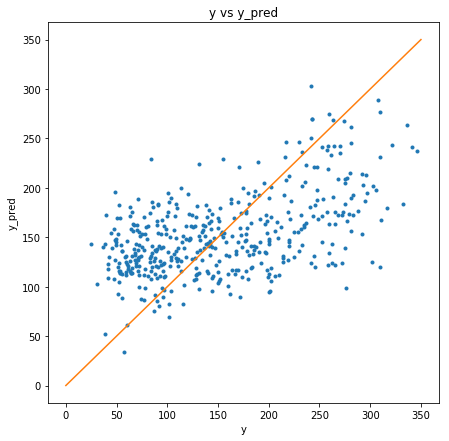

In [60]:
evaluate_model(X_new, y)

# Red neuronal

In [61]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [62]:
model = Sequential()
model.add(Dense(units=6, activation='relu', input_shape=(5,)))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resultado, y, test_size=0.35, random_state=12345)

In [64]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=0)

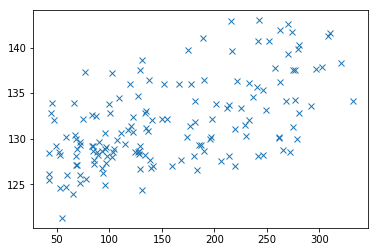

In [65]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
plt.plot(y_test, y_pred, 'x');